**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Encodings

En esta notebook, vamos a cargar el conjunto de datos de la [compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

seaborn.set_context('talk')

In [2]:
import plotly

# Make sure it's 4.14.3
plotly.__version__

'4.14.3'

In [3]:
melb_df = pandas.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')

melb_df.head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


## Codificando valores no numéricos

Hasta este momento hemos realizado análisis de datos sobre distintos tipos de variables aleatorias. Sin embargo, muchos métodos utilizados para *Aprendizaje Automático* pueden ser aplicados solamente a matrices numéricas.

Por ello, antes de comenzar con cualquier tipo de modelado, tenemos que **codificar** (*encode*) toda la información categórica utilizando unicamente información numérica. Al realizar este proceso tenemos que tener en cuenta algunas propiedades que tendrán nuestros datos codificados, y cómo impactarán en los modelos.

### One-hot encodings

La forma más simple de realizar esta codificación de valores categóricos es construir un vector *One-Hot encoding*. Opera de la siguiente manera:

1. Se identifica el conjunto $C$ de categorías posibles de la variable aleatoria y la cantidad de categorías $N = |C|$.
2. Se asigna un número entero a cada categoría en el rango $[0; N)$.
3. Para cada valor $r_i$ de nuestro conjunto de datos con categoría $c_j$:

    1. Se construye un vector $x_i$ de $0s$ de tamaño $N$.
    2. Se asigna el valor $1$ al vector $x_i$ en la posición de la categoría $c_j$.

Comenzaremos a trabajar con la librería *scikit-learn*, que dispone de la mayoría de funciones necesarias para pre-procesar un conjunto de datos y cuenta con tutoriales que explican las distintas opciones. Les recomendamos la sección de [Encoding Categorical Features](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features).

Utilizaremos la clase *OneHotEncoder* para realizar la codificación. Todos los transformadores de *scikit-learn* siguen una misma interfaz en dos etapas: `fit` y `transform`.
* El método `fit` (entrenar) es el encargado de recopilar toda la información necesaria para aplicar el *encoding*. En este caso, implementa los pasos 1 y 2 del algoritmo anterior.
* El método `transform` es el que efectivamente construye los *encoding* para cada fila del conjunto de datos.

In [4]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
encoder.fit(melb_df[['Type']])

# We can inspect the categories found by the encoder
encoder.categories_

[array(['h', 't', 'u'], dtype=object)]

In [5]:
encoded_types = encoder.transform(melb_df[['Type']])

encoded_types[:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

Esta transformación es tan común que *scikit-learn* implementa el transformador `DictVectorizer` que codifica automáticamente todas las columnas categóricas y las combina con los datos numéricos existentes.

Para poder utilizarlo, tendremos que convertir el conjunto de datos en una lista de diccionarios.

In [6]:
feature_cols = [ 'Suburb'
               , 'Type'
               , 'Distance'
               , 'Bedroom2'
               , 'Bathroom'
               , 'Car'
               , 'Landsize'
               , 'BuildingArea'
               , 'YearBuilt'
               , 'Regionname'
               ]

feature_dict = list(melb_df[feature_cols].T.to_dict().values())
feature_dict[:1]

[{'Suburb': 'Abbotsford',
  'Type': 'h',
  'Distance': 2.5,
  'Bedroom2': 2.0,
  'Bathroom': 1.0,
  'Car': 1.0,
  'Landsize': 202.0,
  'BuildingArea': nan,
  'YearBuilt': nan,
  'Regionname': 'Northern Metropolitan'}]

In [7]:
from sklearn.feature_extraction import DictVectorizer

vec = DictVectorizer()
feature_matrix = vec.fit_transform(feature_dict)

In [8]:
feature_matrix

<13580x332 sparse matrix of type '<class 'numpy.float64'>'
	with 135800 stored elements in Compressed Sparse Row format>

De las **332** columnas:

- 314 son por `Suburb`.
- 3 son por `Type`.
- 8 son por `Regionname`.
- 7 son por `Distance`, `Bedroom2`, `Bathroom`, `Car`, `Landsize`, `BuildingArea`, `YearBuilt`.

In [9]:
vec.get_feature_names()[:15]

['Bathroom',
 'Bedroom2',
 'BuildingArea',
 'Car',
 'Distance',
 'Landsize',
 'Regionname=Eastern Metropolitan',
 'Regionname=Eastern Victoria',
 'Regionname=Northern Metropolitan',
 'Regionname=Northern Victoria',
 'Regionname=South-Eastern Metropolitan',
 'Regionname=Southern Metropolitan',
 'Regionname=Western Metropolitan',
 'Regionname=Western Victoria',
 'Suburb=Abbotsford']

## Matrices esparsas

Las codificaciones *one-hot* tienen la propiedad de aumentar la cantidad de memoria requerida para almacenar una variable de manera **cuadrática** con respecto al número de categorías. Sin embargo, la mayoría de los elementos de la nueva representación serán nulos. La cantidad de elementos no-nulos de la matriz crece **linealmente** con respecto al número de categorías a representar.

Por ello existen las *matrices esparsas*, que almacenan unicamente los valores no-nulos de una matriz en distintas estructuras de datos.

Los métodos de codificación como `DictVectorizer` o `OneHotEncoding` suelen devolver como resultado matrices esparsas, si es más eficiente en términos de recursos computacionales.

![picture](https://matteding.github.io/images/coo.gif)

Existen [distintos tipos de matrices esparsas](https://docs.scipy.org/doc/scipy/reference/sparse.html), y las operaciones sobre cada una de ellas son distintas; y diferentes a las matrices densas.

In [10]:
# Fill nan values on sparse matrix.
if numpy.any(numpy.isnan(feature_matrix.data)):
    feature_matrix.data = numpy.nan_to_num(feature_matrix.data)

In [11]:
feature_matrix

<13580x332 sparse matrix of type '<class 'numpy.float64'>'
	with 135800 stored elements in Compressed Sparse Row format>

Para aplicar algunas transformaciones o modelos es necesario convertir las matrices **esparsas** a **densas**.
Antes de realizar este cambio, es recomendable calcular el tamaño de la matriz final.
Recordar que cada número de punto flotante ocupa $4$ bytes para la precisión simple (`numpy.float32`) y $8$ bytes para la precisión doble (`numpy.float64`).

In [12]:
# Before doing this type of conversion, it's mandatory to calculate
# the size of the resulting matrix!
matrix_size_mb = feature_matrix.shape[0] * feature_matrix.shape[1] * 4 / 1024 / 1024
print("The dense matrix will weight approximately {:.2f} MB".format(matrix_size_mb))

limit_size_mb = 10
precision_type = numpy.float32
if matrix_size_mb < limit_size_mb:  # Matrix is less than 10MB
    dense_feature_matrix = feature_matrix.astype(precision_type).todense()
else:
    # We calculate how many rows would fit given the number of columns
    n_rows = int(limit_size_mb * 1024 * 1024 / 4 / feature_matrix.shape[1])
    print("Matrix too big! Using only first {} of {} rows".format(n_rows, feature_matrix.shape[0]))
    dense_feature_matrix = feature_matrix[:n_rows].astype(precision_type).todense()

print("Final size: {:.2f}".format(dense_feature_matrix.nbytes / 1024 / 1024))

The dense matrix will weight approximately 17.20 MB
Matrix too big! Using only first 7895 of 13580 rows
Final size: 10.00


In [13]:
# Remember to cut your original data as well.
if dense_feature_matrix.shape[0] < len(melb_df):
    melb_df_sample = melb_df.iloc[:dense_feature_matrix.shape[0]].copy()
else:
    melb_df_sample = melb_df.copy()

print(f'Using only {melb_df_sample.shape[0]} rows')

Using only 7895 rows


## Reducción de dimensionalidad con PCA

En las siguientes celdas, aplicaremos [PCA](https://scikit-learn.org/stable/modules/decomposition.html#pca) para reducir la dimensionalidad del conjunto de datos a dos dimensiones.
Se seguirá un proceso similar al visto en la *notebook 05*.

In [14]:
# TODO Here we have to pre-process the matrix before applying PCA
scaled_dense_feature_matrix = dense_feature_matrix

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=15)
pca.fit(scaled_dense_feature_matrix)

proyected_features = pca.transform(scaled_dense_feature_matrix)
proyected_features.shape

(7895, 15)

In [16]:
pca.explained_variance_ratio_

array([6.37925088e-01, 3.56073648e-01, 5.98898670e-03, 5.13426903e-06,
       4.98282361e-07, 2.23438363e-07, 1.67116795e-07, 1.03559145e-07,
       9.63217772e-08, 7.86618912e-08, 4.34447571e-08, 3.65197081e-08,
       1.05544036e-08, 9.48278966e-09, 8.83620377e-09], dtype=float32)

In [17]:
melb_df_sample['pca1_scaled'] = proyected_features[:, 0]
melb_df_sample['pca2_scaled'] = proyected_features[:, 1]

In [18]:
melb_df_sample.head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,pca1_scaled,pca2_scaled
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,-198.044266,-1256.850464
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,-327.023834,640.804565
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,-348.955627,643.738831


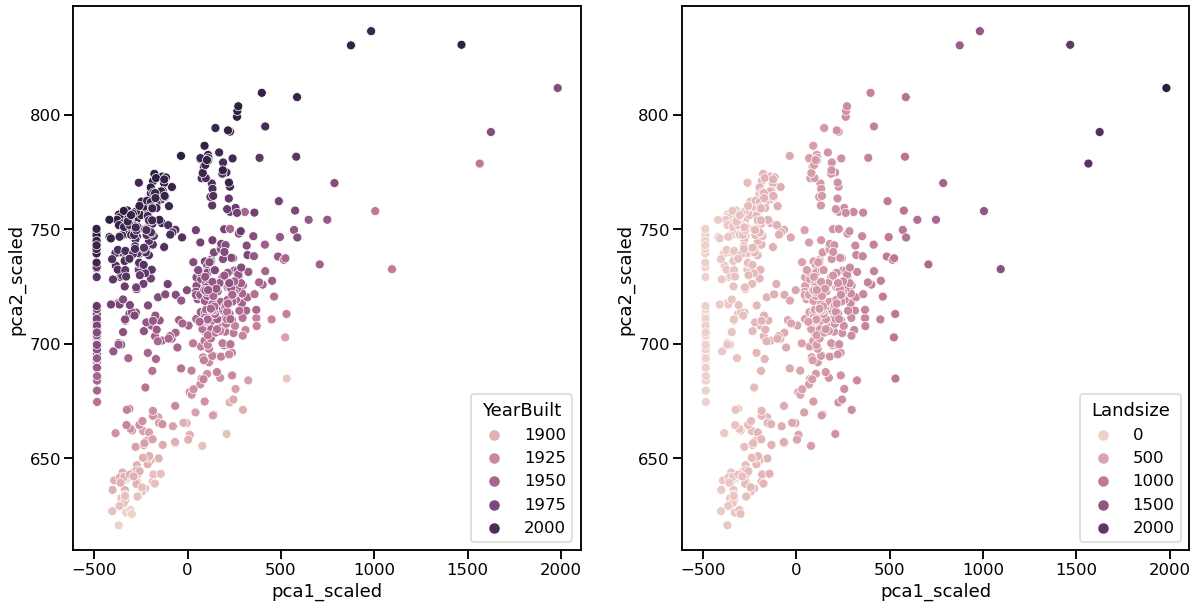

In [19]:
cols = ['YearBuilt', 'Landsize'] + ['pca1_scaled', 'pca2_scaled']
data = melb_df_sample[cols][:1000].dropna(how='any')

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

seaborn.scatterplot(data=data,
                    x='pca1_scaled',
                    y='pca2_scaled',
                    hue='YearBuilt',
                    ax=axes[0]
                   );

seaborn.scatterplot(data=data,
                    x='pca1_scaled',
                    y='pca2_scaled',
                    hue='Landsize',
                    ax=axes[1]
                   );

### Análisis de correlación (visual) con otras variables

Los datos proyectados con métodos como **PCA** dejan de ser directamente interpretables: cada columna no se corresponde con una propiedad de los datos, sino que es una **combinación** de las propiedades anteriores. 

Sin embargo, a través de las visualizaciones podemos entender qué tanto peso tiene cada una de las variables originales en nuestra nueva transformación. En el gráfico anterior podemos ver que una de las direcciones se corresponde con el año de construcción y la otra con la cantidad de metros construidos. 

**¿Por qué sucede esto?**

Porque las variables no están en las mismas unidades; como los valores de los años son muy grandes, esa columna tiene la mayor **varianza** en los datos, y por lo tanto los primeros componentes principales están muy alineados con esa dimensión.

Tenemos que volver a escalar todos los datos a un mismo rango. ¿Utilizamos estandarización o escalado linear?

### ¿Cuántos componentes principales utilizar?

Cuando queremos visualizar un conjunto de datos con demasiadas dimensiones, proyectamos los puntos a **2D** o **3D**.
Sin embargo, si el objetivo es generar una matriz más pequeña...

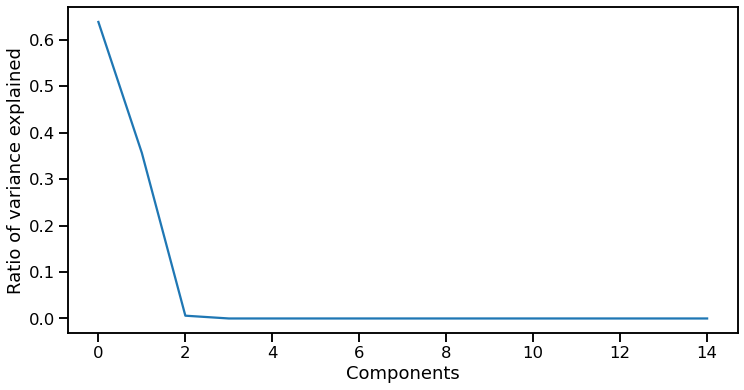

In [20]:
fig = plt.figure(figsize=(12, 6))

seaborn.lineplot(x=range(pca.n_components),
                 y=pca.explained_variance_ratio_
                )

plt.xlabel("Components");
plt.ylabel("Ratio of variance explained");

## Ejercicio: Pre-procesar la matriz antes de aplicar PCA

#### Escalado

In [21]:
df = pandas.DataFrame(dense_feature_matrix)

df.describe()

,0,1,2,3,4,5,6,7,8,9,...,322,323,324,325,326,327,328,329,330,331
count,7895.000000,7895.000000,7895.000000,7895.000000,7895.000000,7895.000000,7895.000000,7895.0,7895.000000,7895.0,...,7895.0,7895.0,7895.0,7895.000000,7895.0,7895.000000,7895.000000,7895.000000,7895.000000,7895.000000
mean,1.500697,2.802280,79.526489,1.522989,8.552299,454.648132,0.074224,0.0,0.298797,0.0,...,0.0,0.0,0.0,0.002153,0.0,0.012920,0.655098,0.087270,0.257631,1244.528076
std,0.695250,0.968882,132.983627,0.917801,3.577987,1265.159058,0.262152,0.0,0.457760,0.0,...,0.0,0.0,0.0,0.046356,0.0,0.112935,0.475366,0.282249,0.437358,944.936890
min,0.000000,0.000000,0.000000,0.000000,1.200000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,1.000000,5.800000,132.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,3.000000,63.000000,1.000000,8.700000,338.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,1928.000000
75%,2.000000,3.000000,129.000000,2.000000,11.200000,616.000000,0.000000,0.0,1.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,1.000000,0.000000,1.000000,1970.000000
max,8.000000,20.000000,6791.000000,8.000000,15.000000,75100.000000,1.000000,0.0,1.000000,0.0,...,0.0,0.0,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,2018.000000


In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# También sería posible utilizar 'MinMaxScaler'
scaled_dense_feature_matrix = StandardScaler().fit_transform(dense_feature_matrix)

In [23]:
df = pandas.DataFrame(scaled_dense_feature_matrix)

df.describe()

,0,1,2,3,4,5,6,7,8,9,...,322,323,324,325,326,327,328,329,330,331
count,7.895000e+03,7.895000e+03,7.895000e+03,7.895000e+03,7.895000e+03,7.895000e+03,7.895000e+03,7895.0,7.895000e+03,7895.0,...,7895.0,7895.0,7895.0,7.895000e+03,7895.0,7895.000000,7.895000e+03,7.895000e+03,7.895000e+03,7.895000e+03
mean,-3.865431e-09,-3.092345e-08,1.546172e-08,-1.546172e-08,-7.730862e-09,3.382252e-09,1.739444e-08,0.0,3.865431e-08,0.0,...,0.0,0.0,0.0,1.932716e-09,0.0,0.000000,-1.932716e-09,-5.025060e-08,-4.251974e-08,-3.865431e-08
std,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,0.0,1.000063e+00,0.0,...,0.0,0.0,0.0,1.000063e+00,0.0,1.000063,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00
min,-2.158635e+00,-2.892464e+00,-5.980550e-01,-1.659495e+00,-2.055000e+00,-3.593832e-01,-2.831521e-01,0.0,-6.527786e-01,0.0,...,0.0,0.0,0.0,-4.645329e-02,0.0,-0.114406,-1.378178e+00,-3.092164e-01,-5.891008e-01,-1.317132e+00
25%,-7.202131e-01,-8.280993e-01,-5.980550e-01,-5.698647e-01,-7.692798e-01,-2.550419e-01,-2.831521e-01,0.0,-6.527786e-01,0.0,...,0.0,0.0,0.0,-4.645329e-02,0.0,-0.114406,-1.378178e+00,-3.092164e-01,-5.891008e-01,-1.317132e+00
50%,-7.202131e-01,2.040832e-01,-1.242825e-01,-5.698647e-01,4.128307e-02,-9.220621e-02,-2.831521e-01,0.0,-6.527786e-01,0.0,...,0.0,0.0,0.0,-4.645329e-02,0.0,-0.114406,7.255955e-01,-3.092164e-01,-5.891008e-01,7.233449e-01
75%,7.182090e-01,2.040832e-01,3.720506e-01,5.197652e-01,7.400442e-01,1.275429e-01,-2.831521e-01,0.0,1.531913e+00,0.0,...,0.0,0.0,0.0,-4.645329e-02,0.0,-0.114406,7.255955e-01,-3.092164e-01,1.697502e+00,7.677951e-01
max,9.348742e+00,1.775118e+01,5.047161e+01,7.057545e+00,1.802161e+00,5.900450e+01,3.531670e+00,0.0,1.531913e+00,0.0,...,0.0,0.0,0.0,2.152700e+01,0.0,8.740822,7.255955e-01,3.233981e+00,1.697502e+00,8.185953e-01


#### PCA

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=15)
pca.fit(scaled_dense_feature_matrix)

proyected_features = pca.transform(scaled_dense_feature_matrix)
proyected_features.shape

(7895, 15)

In [25]:
pca.explained_variance_ratio_

array([0.02208827, 0.01724881, 0.01447852, 0.01342844, 0.01286524,
       0.01061435, 0.00996114, 0.00805065, 0.00729977, 0.00665507,
       0.0065098 , 0.006439  , 0.00643513, 0.00643052, 0.00642423],
      dtype=float32)

In [26]:
melb_df_sample['pca1_scaled'] = proyected_features[:, 0]
melb_df_sample['pca2_scaled'] = proyected_features[:, 1]

In [27]:
melb_df_sample.head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,pca1_scaled,pca2_scaled
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,-1.926432,-2.325152
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,-2.152253,-2.257980
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,-1.250374,-2.138231


#### Visualización

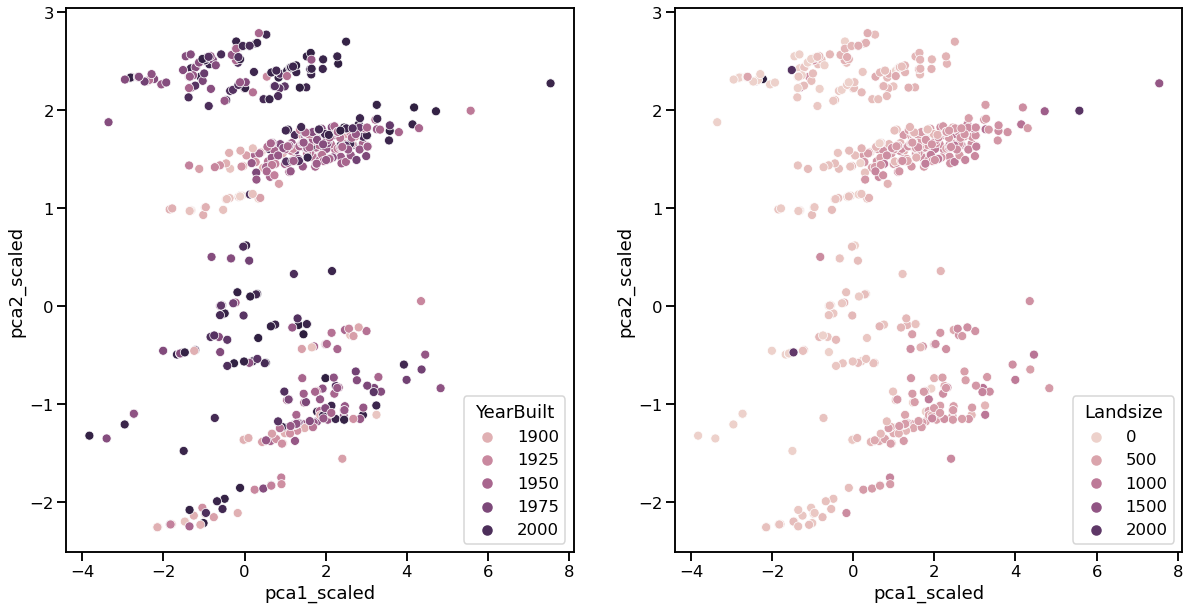

In [28]:
cols = ['YearBuilt', 'Landsize'] + ['pca1_scaled', 'pca2_scaled']
data = melb_df_sample[cols][:1000].dropna(how='any')

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

seaborn.scatterplot(data=data,
                    x='pca1_scaled',
                    y='pca2_scaled',
                    hue='YearBuilt',
                    ax=axes[0]
                   );

seaborn.scatterplot(data=data,
                    x='pca1_scaled',
                    y='pca2_scaled',
                    hue='Landsize',
                    ax=axes[1]
                   );

#### Varianza

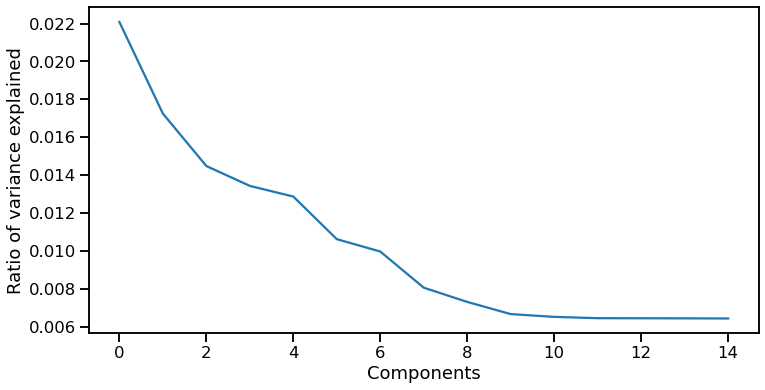

In [29]:
fig = plt.figure(figsize=(12, 6))

seaborn.lineplot(x=range(pca.n_components),
                 y=pca.explained_variance_ratio_
                )

plt.xlabel("Components");
plt.ylabel("Ratio of variance explained");